<a href="https://colab.research.google.com/github/yjpark777/hotel-booking-demand/blob/main/hotel_booking_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필요한 패키지 임포트

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(color_codes=True)
%matplotlib inline

In [4]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand
df = pd.read_csv("hotel_bookings.csv")

# 데이터 샘플 확인
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [5]:
# 각 칼럼의 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111304 entries, 0 to 111303
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           111304 non-null  object 
 1   is_canceled                     111304 non-null  int64  
 2   lead_time                       111304 non-null  int64  
 3   arrival_date_year               111304 non-null  int64  
 4   arrival_date_month              111304 non-null  object 
 5   arrival_date_week_number        111304 non-null  int64  
 6   arrival_date_day_of_month       111304 non-null  int64  
 7   stays_in_weekend_nights         111304 non-null  int64  
 8   stays_in_week_nights            111304 non-null  int64  
 9   adults                          111304 non-null  int64  
 10  children                        111300 non-null  float64
 11  babies                          111304 non-null  int64  
 12  meal            

In [6]:
# 각 칼럼의 통계치 확인
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111300.000000,111304.000000,111303.000000,111303.000000,111303.000000,111303.000000,95479.000000,6572.000000,111303.000000,111303.000000,111303.000000,111303.000000
mean,0.397290,102.222822,2016.095280,27.204817,15.754375,0.932599,2.520260,1.851676,0.101635,0.008158,0.033854,0.093403,0.146106,0.214451,90.481781,187.829276,2.487768,99.622763,0.065182,0.549886
std,0.489339,105.813183,0.693864,14.029843,8.793255,1.007712,1.937874,0.583290,0.394600,0.099078,0.180853,0.874113,1.549133,0.639108,111.859890,130.891865,18.207768,50.397448,0.250139,0.782717
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,17.000000,2016.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,67.000000,0.000000,0.000000
50%,0.000000,67.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,90.950000,0.000000,0.000000
75%,1.000000,158.000000,2017.000000,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,269.000000,0.000000,122.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
# 각 칼럼의 왜도 확인
df.skew()

<ipython-input-7-864810a89c40>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


is_canceled                        0.419797
lead_time                          1.353520
arrival_date_year                 -0.129323
arrival_date_week_number          -0.017416
arrival_date_day_of_month          0.002742
stays_in_weekend_nights            1.416576
stays_in_week_nights               2.891879
adults                            19.261493
children                           4.161640
babies                            24.768689
is_repeated_guest                  5.155072
previous_cancellations            23.622774
previous_bookings_not_canceled    22.781761
booking_changes                    5.884508
agent                              0.992521
company                            0.598399
days_in_waiting_list              11.532215
adr                               11.379125
required_car_parking_spaces        4.074928
total_of_special_requests          1.386717
dtype: float64

In [8]:
# 각 칼럼의 첨도 확인
df.kurtosis()

<ipython-input-8-845f6e9fceec>:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


is_canceled                         -1.823803
lead_time                            1.728723
arrival_date_year                   -0.926194
arrival_date_week_number            -1.091472
arrival_date_day_of_month           -1.189237
stays_in_weekend_nights              7.420981
stays_in_week_nights                24.308878
adults                            1411.248653
children                            19.286261
babies                            1635.463081
is_repeated_guest                   24.575210
previous_cancellations             628.571649
previous_bookings_not_canceled     717.765672
booking_changes                     76.088411
agent                               -0.258047
company                             -0.490148
days_in_waiting_list               174.088986
adr                               1100.621801
required_car_parking_spaces         29.127944
total_of_special_requests            1.569939
dtype: float64

<ipython-input-9-9f2d319b9350>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lead_time'])


<Axes: xlabel='lead_time', ylabel='Density'>

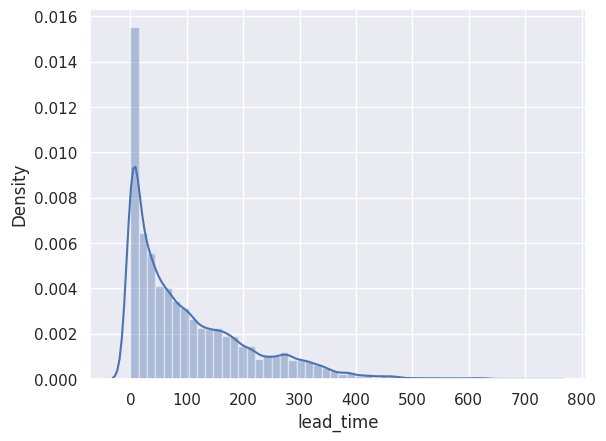

In [9]:
# 특정 변수 분포 시각화
sns.distplot(df['lead_time'])

<Axes: xlabel='hotel', ylabel='lead_time'>

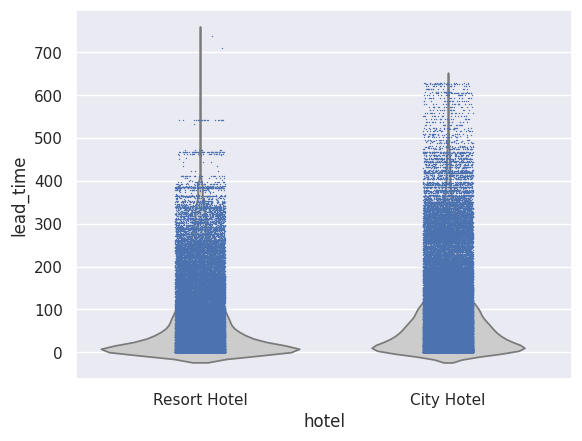

In [12]:
# 호텔 구분에 따른 lead_time 분포 차이 시각화
sns.violinplot(x="hotel", y="lead_time", data=df, inner=None, color=".8")
sns.stripplot(x="hotel", y="lead_time", data=df, size=1)